<a href="https://colab.research.google.com/github/sSaadhussain02/Codercave/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Terrorism**

In [77]:
!pip install basemap
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from mpl_toolkits.basemap import Basemap

warnings.filterwarnings('ignore')

### Importing csv file

In [78]:
data = pd.read_csv('/content/output.csv')

In [79]:
data.head()

Year  Month  Day  CountryNo             Country  \
0  1970      7    2         58  Dominican Republic   
1  1970      0    0        130              Mexico   
2  1970      1    0        160         Philippines   
3  1970      1    0         78              Greece   
4  1970      1    0        101               Japan   

                        Region           City  success  \
0  Central America & Caribbean  Santo Domingo        1   
1                North America    Mexico city        1   
2               Southeast Asia        Unknown        1   
3               Western Europe         Athens        1   
4                    East Asia        Fukouka        1   

                       AttackType  NoOfKills  PropertyValue  \
0                   Assassination        1.0            0.0   
1     Hostage Taking (Kidnapping)        0.0            0.0   
2                   Assassination        1.0            0.0   
3               Bombing/Explosion        0.0            0.0   
4  Facility/Infrastructure Attack        0.0            0.0   

                    TargetType   latitude                           GroupName  \
0  Private Citizens & Property  18.456792                              MANO-D   
1      Government (Diplomatic)  19.371887  23rd of September Communist League   
2          Journalists & Media  15.478598                             Unknown   
3      Government (Diplomatic)  37.997490                             Unknown   
4      Government (Diplomatic)  33.580412                             Unknown   

    longitude                                      TargetSubType  \
0  -69.951164                                     Named Civilian   
1  -99.086624  Diplomatic Personnel (outside of embassy, cons...   
2  120.599741                    Radio Journalist/Staff/Facility   
3   23.762728                                  Embassy/Consulate   
4  130.396361                                  Embassy/Consulate   

                    Target  WeaponType WeaponDetail  
0             Julio Guzman     Unknown          NaN  
1  Nadine Chaval, daughter     Unknown          NaN  
2                 Employee     Unknown          NaN  
3             U.S. Embassy  Explosives    Explosive  
4           U.S. Consulate  Incendiary   Incendiary

In [80]:
data.dtypes

Year               int64
Month              int64
Day                int64
CountryNo          int64
Country           object
Region            object
City              object
success            int64
AttackType        object
NoOfKills        float64
PropertyValue    float64
TargetType        object
latitude         float64
GroupName         object
longitude        float64
TargetSubType     object
Target            object
WeaponType        object
WeaponDetail      object
dtype: object

In [81]:
data.columns

Index(['Year', 'Month', 'Day', 'CountryNo', 'Country', 'Region', 'City',
       'success', 'AttackType', 'NoOfKills', 'PropertyValue', 'TargetType',
       'latitude', 'GroupName', 'longitude', 'TargetSubType', 'Target',
       'WeaponType', 'WeaponDetail'],
      dtype='object')

checking for **null** **values**

In [82]:
data.isnull().sum()

Year                 0
Month                0
Day                  0
CountryNo            0
Country              0
Region               0
City                 0
success              0
AttackType           0
NoOfKills            0
PropertyValue        0
TargetType           0
latitude          4556
GroupName            0
longitude         4557
TargetSubType    10373
Target               0
WeaponType           0
WeaponDetail     67670
dtype: int64

In [83]:
data['NoOfKills'].fillna(int(data['NoOfKills'].median()),inplace=True)
data['latitude'].fillna(data['latitude'].mean(), inplace=True)
data['longitude'].fillna(data['longitude'].mean(), inplace=True)

### **droping null values**

In [84]:
data.dropna(subset=['Target', 'TargetSubType', 'WeaponType', 'WeaponDetail', 'GroupName'], inplace=True)


In [85]:
data.isnull().sum()

Year             0
Month            0
Day              0
CountryNo        0
Country          0
Region           0
City             0
success          0
AttackType       0
NoOfKills        0
PropertyValue    0
TargetType       0
latitude         0
GroupName        0
longitude        0
TargetSubType    0
Target           0
WeaponType       0
WeaponDetail     0
dtype: int64

droping **CountryNo**

In [86]:
data.drop(['CountryNo'], axis=1)


Year  Month  Day        Country                      Region  \
3       1970      1    0         Greece              Western Europe   
4       1970      1    0          Japan                   East Asia   
5       1970      1    1  United States               North America   
6       1970      1    2        Uruguay               South America   
8       1970      1    2  United States               North America   
...      ...    ...  ...            ...                         ...   
181680  2017     12   31        Somalia          Sub-Saharan Africa   
181681  2017     12   31    Philippines              Southeast Asia   
181684  2017     12   31          India                  South Asia   
181687  2017     12   31          Syria  Middle East & North Africa   
181689  2017     12   31          India                  South Asia   

                 City  success                      AttackType  NoOfKills  \
3              Athens        1               Bombing/Explosion        0.0   
4             Fukouka        1  Facility/Infrastructure Attack        0.0   
5               Cairo        1                   Armed Assault        0.0   
6          Montevideo        0                   Assassination        0.0   
8             Madison        1  Facility/Infrastructure Attack        0.0   
...               ...      ...                             ...        ...   
181680          Wajid        1               Bombing/Explosion        0.0   
181681  Shariff Aguak        1               Bombing/Explosion        1.0   
181684        Hungrum        1     Hostage Taking (Kidnapping)        0.0   
181687         Jableh        1               Bombing/Explosion        2.0   
181689         Imphal        0               Bombing/Explosion        0.0   

        PropertyValue               TargetType   latitude  \
3                 0.0  Government (Diplomatic)  37.997490   
4                 0.0  Government (Diplomatic)  33.580412   
5                 0.0                   Police  37.005105   
6                 0.0                   Police -34.891151   
8             60000.0                 Military  43.076592   
...               ...                      ...        ...   
181680            0.0                 Military   3.810951   
181681          -99.0                   Police   6.862806   
181684            0.0     Government (General)  25.180162   
181687          -99.0                 Military  35.407278   
181689            0.0     Government (General)  24.798346   

                                         GroupName   longitude  \
3                                          Unknown   23.762728   
4                                          Unknown  130.396361   
5                               Black Nationalists  -89.176269   
6                              Tupamaros (Uruguay)  -56.187214   
8                                  New Year's Gang  -89.412488   
...                                            ...         ...   
181680                                  Al-Shabaab   43.246506   
181681  Bangsamoro Islamic Freedom Movement (BIFM)  124.443649   
181684                    Zeliangrong United Front   93.015788   
181687                           Muslim extremists   35.942679   
181689                                     Unknown   93.940430   

                                            TargetSubType  \
3                                       Embassy/Consulate   
4                                       Embassy/Consulate   
5         Police Building (headquarters, station, school)   
6                         Police Security Forces/Officers   
8                     Military Recruiting Station/Academy   
...                                                   ...   
181680      Military Barracks/Base/Headquarters/Checkpost   
181681     Police Patrol (including vehicles and convoys)   
181684  Politician or Political Party Movement/Meeting...   
181687      Military Barracks/Base/Headquarters/Checkpost   
181689                Government 

# **Features**

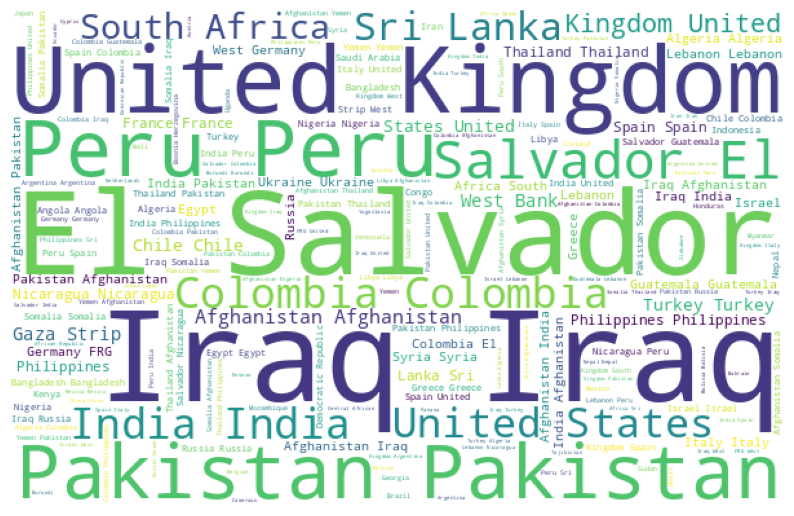

In [87]:
from wordcloud import WordCloud
from scipy import signal
Country = data.Country.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 600,
                     height = 384).generate(' '.join(Country))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()




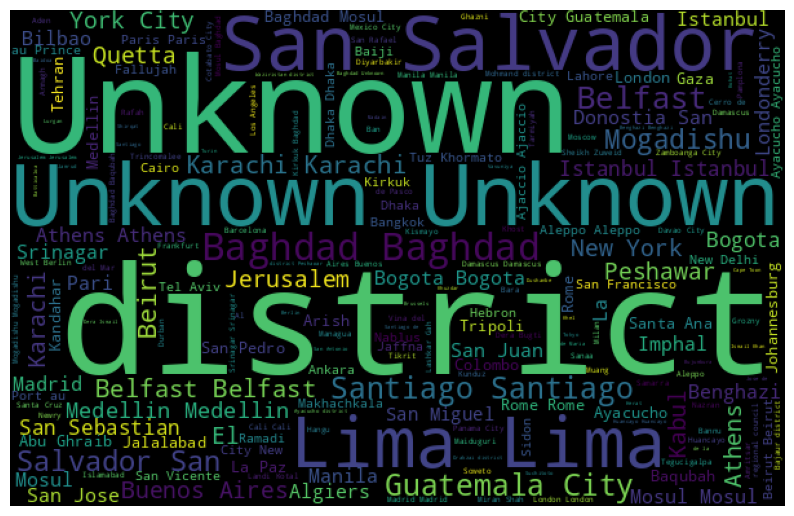

In [88]:
cities = data.City.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 600,
                     height = 384).generate(' '.join(cities))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()


## **Facts**

In [89]:
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Most Attack Types :",data['AttackType'].value_counts().idxmax())
print("Most No Of Kills :",data['NoOfKills'].value_counts().idxmax())
print("Group with the most attacks:",data['GroupName'].value_counts().idxmax())
print("Type of weapon used with the most attacks:",data['WeaponType'].value_counts().idxmax())
print("Most targeted area:",data['Target'].value_counts().idxmax())


Region with the most attacks: Middle East & North Africa
Country with the most attacks: Iraq
Year with the most attacks: 2014
Most Attack Types : Bombing/Explosion
Most No Of Kills : 0.0
Group with the most attacks: Unknown
Type of weapon used with the most attacks: Explosives
Most targeted area: Civilians


In [90]:
killData = data.loc[:,'NoOfKills']
print('Number of people killed by Terror attack:', int(sum(killData.dropna())))

Number of people killed by Terror attack: 233729


# **visualization**

Name of the groups with **multiple *Attacks***

In [91]:
data.GroupName.value_counts()[1:15]

Shining Path (SL)                                   4164
Farabundo Marti National Liberation Front (FMLN)    3225
Taliban                                             2724
Irish Republican Army (IRA)                         2458
Islamic State of Iraq and the Levant (ISIL)         1795
Basque Fatherland and Freedom (ETA)                 1707
Kurdistan Workers' Party (PKK)                      1539
New People's Army (NPA)                             1512
Revolutionary Armed Forces of Colombia (FARC)       1511
Communist Party of India - Maoist (CPI-Maoist)      1452
Al-Shabaab                                          1324
National Liberation Army of Colombia (ELN)          1041
Palestinians                                        1034
Liberation Tigers of Tamil Eelam (LTTE)             1026
Name: GroupName, dtype: int64

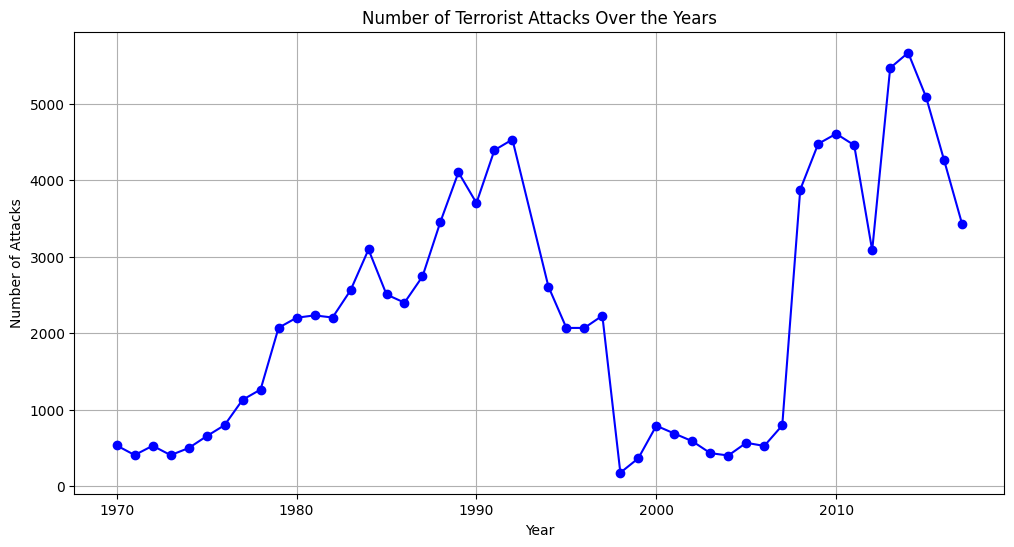

In [133]:
attacks_by_year = data.groupby('Year').size()

# Create a time series plot
plt.figure(figsize=(12, 6))
attacks_by_year.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

### **Affected Countries**

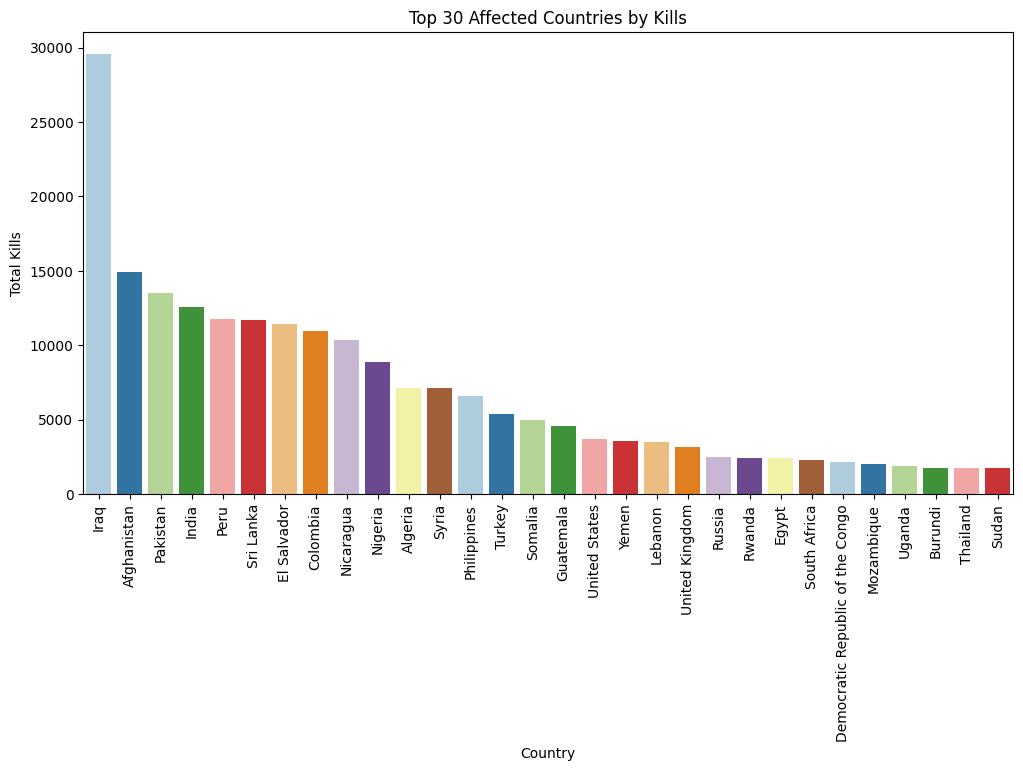

In [92]:
kills_per_country = data.groupby('Country')['NoOfKills'].sum().sort_values(ascending=False)

top_30_country_kills = kills_per_country.head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_country_kills.index, y=top_30_country_kills.values, palette='Paired')

plt.title('Top 30 Affected Countries by Kills')
plt.xlabel('Country')
plt.ylabel('Total Kills')
plt.xticks(rotation=90)
plt.show()

Top 20 Affected Country by **kills**

In [93]:
countryData = data.loc[:,'Country']

In [94]:
countryKillData = pd.concat([countryData, killData], axis=1)

In [95]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='NoOfKills', aggfunc='sum')


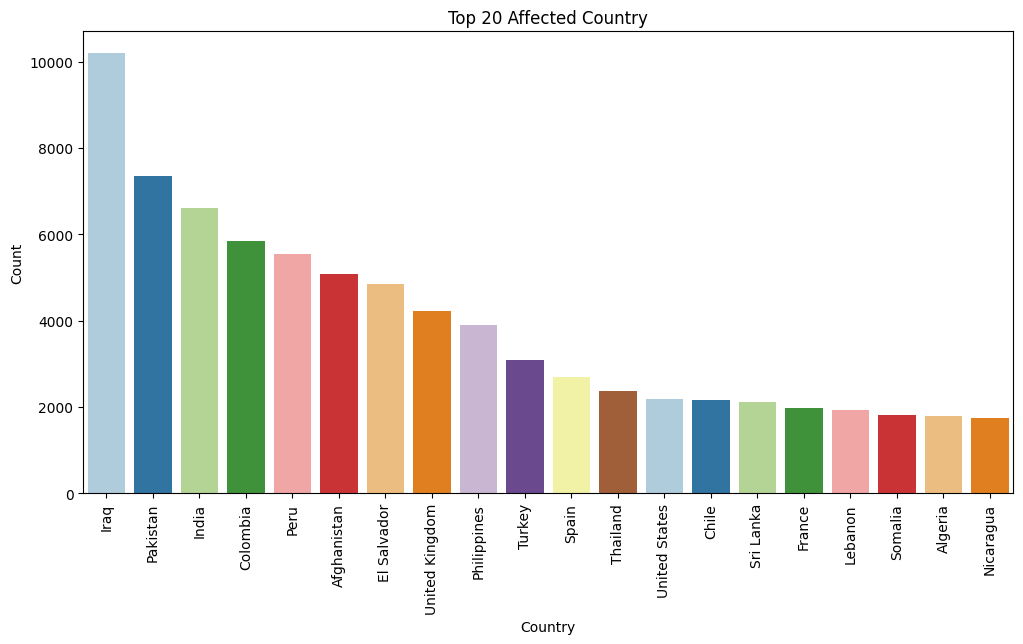

In [96]:

group_counts = data['Country'].value_counts().sort_values(ascending=False)

top_20_Country = group_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_Country.index, y=top_20_Country.values, palette='Paired')

plt.title('Top 20 Affected Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


**Top terrorists group**

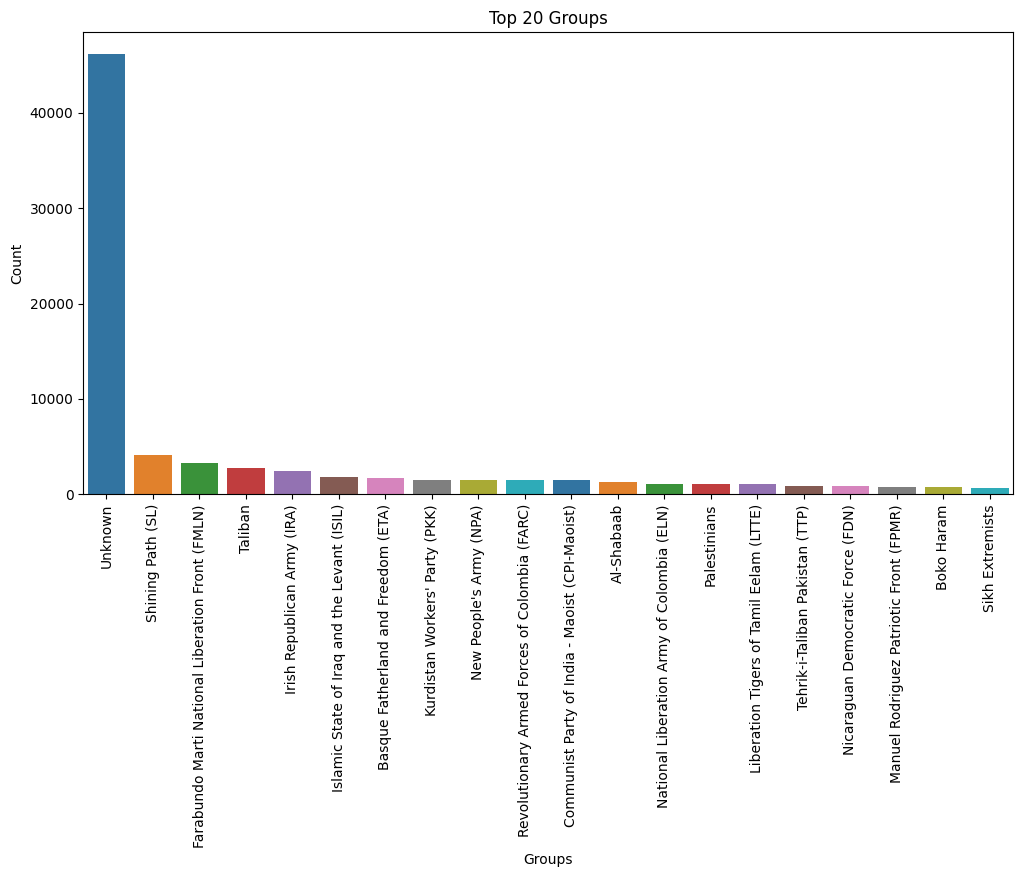

In [97]:
group_counts = data['GroupName'].value_counts().sort_values(ascending=False)

top_20_groups = group_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_groups.index, y=top_20_groups.values, palette='tab10')

plt.title('Top 20 Groups')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [98]:
group_killed= data[['GroupName','NoOfKills']].groupby(['GroupName'],axis=0).sum().sort_values('NoOfKills', ascending=False).head(15)
group_killed

NoOfKills
GroupName                                                  
Unknown                                             58723.0
Islamic State of Iraq and the Levant (ISIL)         13351.0
Shining Path (SL)                                   10720.0
Taliban                                              9893.0
Liberation Tigers of Tamil Eelam (LTTE)              8013.0
Boko Haram                                           7898.0
Farabundo Marti National Liberation Front (FMLN)     7815.0
Nicaraguan Democratic Force (FDN)                    6612.0
Al-Shabaab                                           4534.0
Tehrik-i-Taliban Pakistan (TTP)                      4203.0
Kurdistan Workers' Party (PKK)                       3874.0
Revolutionary Armed Forces of Colombia (FARC)        3753.0
Al-Qaida                                             3401.0
New People's Army (NPA)                              3286.0
Sikh Extremists                                      2597.0

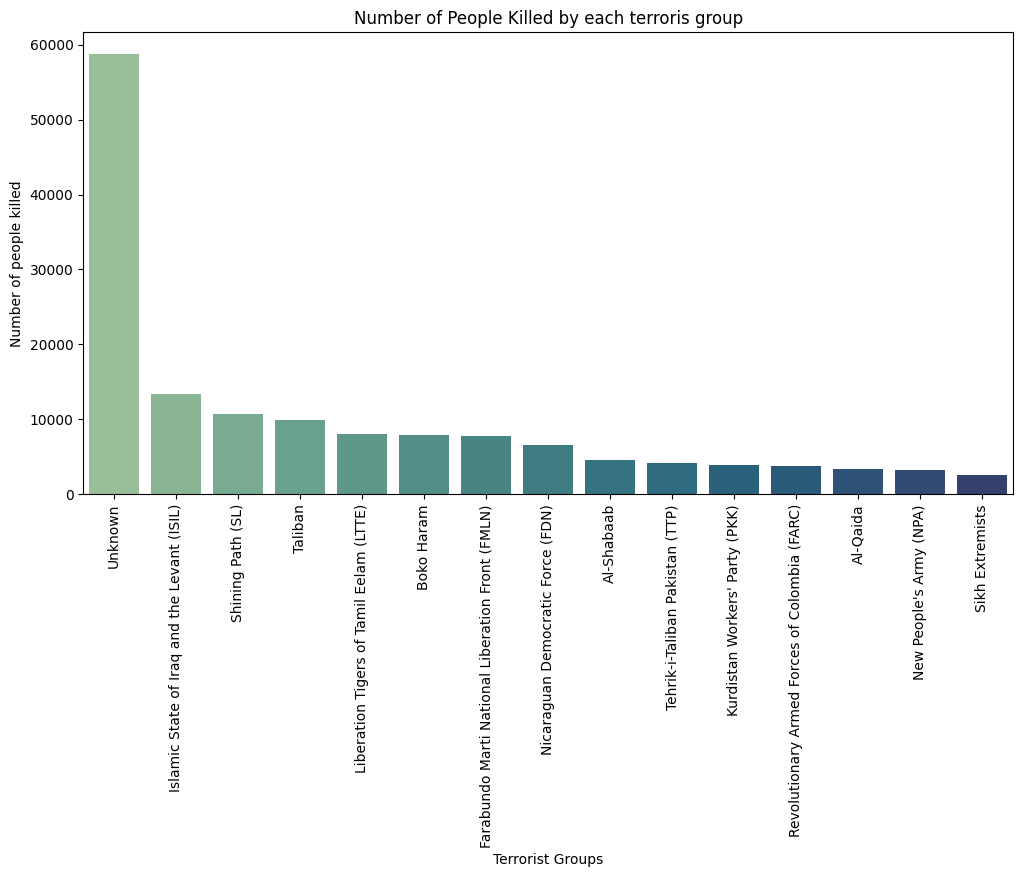

In [99]:
plt.subplots(figsize=(12,6))
sns.barplot(x=group_killed.index,y= group_killed.NoOfKills.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

**Attack pattern**

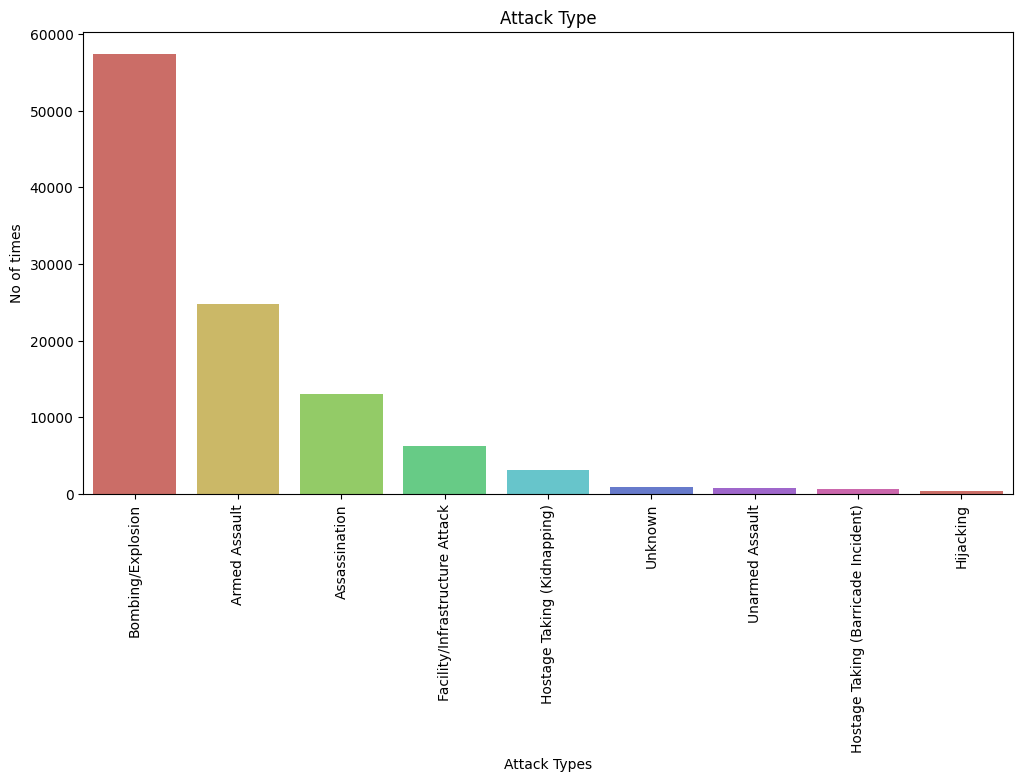

In [100]:
attacktype = data.AttackType.value_counts()[:15]


plt.subplots(figsize=(12,6))
sns.barplot(x=attacktype.index,y=attacktype.values,palette=sns.color_palette("hls", 8))
plt.title('Attack Type')
plt.xlabel('Attack Types')
plt.ylabel('No of times')
plt.xticks(rotation= 90)
plt.show()

In [101]:
attackkilled = data[['AttackType','NoOfKills']].groupby(["AttackType"],axis=0).sum()
attackkilled

NoOfKills
AttackType                                    
Armed Assault                         101999.0
Assassination                          16778.0
Bombing/Explosion                      96314.0
Facility/Infrastructure Attack          1841.0
Hijacking                               3468.0
Hostage Taking (Barricade Incident)     2922.0
Hostage Taking (Kidnapping)             5900.0
Unarmed Assault                          698.0
Unknown                                 3809.0

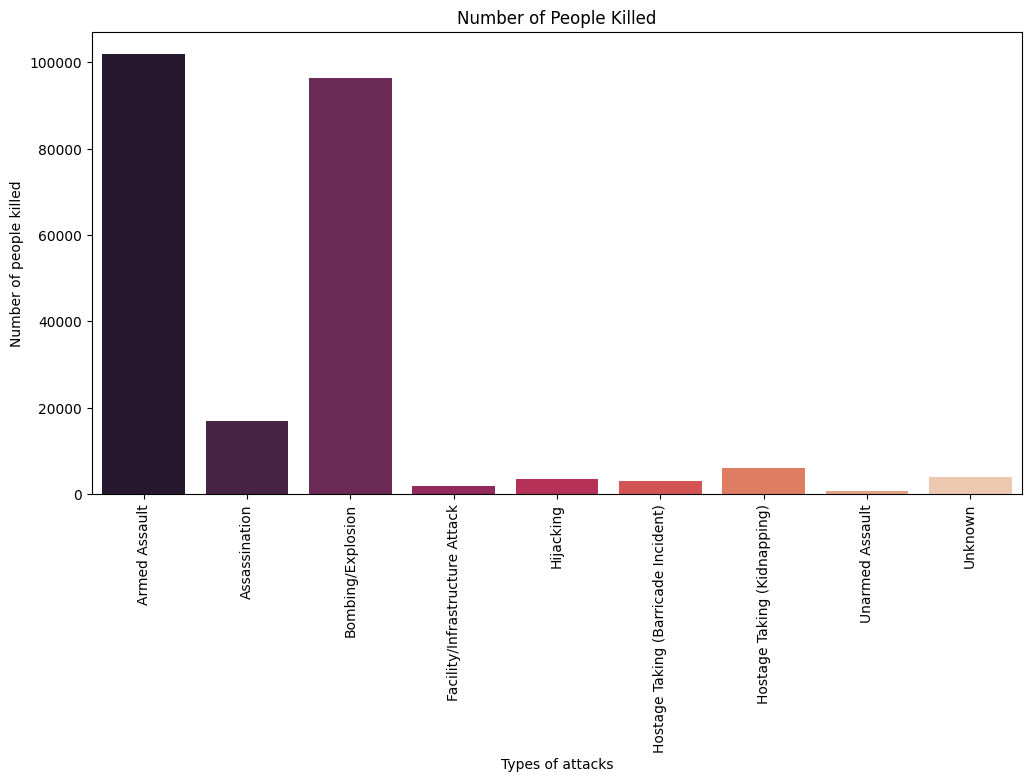

In [102]:
plt.subplots(figsize=(12,6))
sns.barplot(x=attackkilled.index, y=attackkilled.NoOfKills.values,palette=("rocket"))
plt.title('Number of People Killed')
plt.xlabel('Types of attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

In [103]:
region_counts = data.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')
high_risk_threshold = 10
region_counts['risk_score'] = region_counts['incident_count'].apply(lambda x: 'High' if x > high_risk_threshold else 'Low')
print(region_counts[['latitude', 'longitude', 'risk_score']])



        latitude   longitude risk_score
0     -53.154613  -70.916943        Low
1     -51.692214  -57.858900        Low
2     -45.867889  -67.499911        Low
3     -45.571112  -72.068517        Low
4     -45.403544  -72.686416        Low
...          ...         ...        ...
26824  62.257094   25.188353        Low
26825  64.135338  -21.895210        Low
26826  64.837778 -147.716389        Low
26827  65.012089   25.465077        Low
26828  65.683368  -18.100080        Low

[26829 rows x 3 columns]


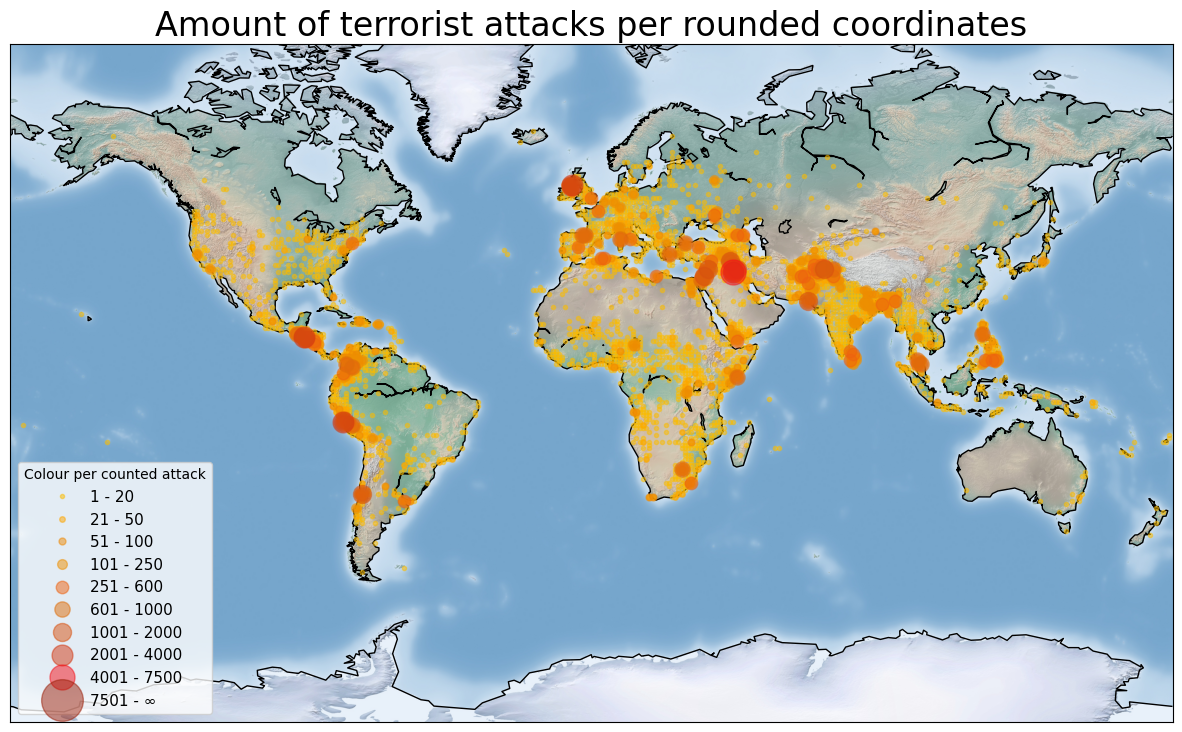

In [104]:
orange_palette = ((3, 0, '#FBBC00', '1 - 20'), (4, 20, '#FDA600', '21 - 50'), (5, 50, '#EE8904', '51 - 100'), \
                  (7, 100, '#ED9001', '101 - 250'), (9, 250, '#ED6210', '251 - 600'), \
                  (11, 600, '#DE6D0A', '601 - 1000'), (13, 1000, '#D8510F', '1001 - 2000'), \
                  (15, 2000, '#D23711', '2001 - 4000'), (18, 4000, '#F61119', '4001 - 7500'), \
                  (30, 7500, '#9C200A', '7501 - ∞')) #marker size, count size, color

plt.figure(figsize=(15,15))

df_coords = data.round({'longitude':0, 'latitude':0}).groupby(["longitude", "latitude"]).size().to_frame(name = 'count').reset_index()
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.shadedrelief()

def plot_points(marker_size, count_size, colour, label_count):
    x, y = m(list(df_coords.longitude[df_coords['count'] >= count_size].astype("float")),\
                (list(df_coords.latitude[df_coords['count'] >= count_size].astype("float"))))
    points = m.plot(x, y, "o", markersize = marker_size, color = colour, label = label_count, alpha = .5)

for p in orange_palette:
    plot_points(p[0], p[1], p[2], p[3])

plt.title("Amount of terrorist attacks per rounded coordinates", fontsize=24)
plt.legend(title= 'Colour per counted attack', loc ='lower left', prop= {'size':11})
plt.show()

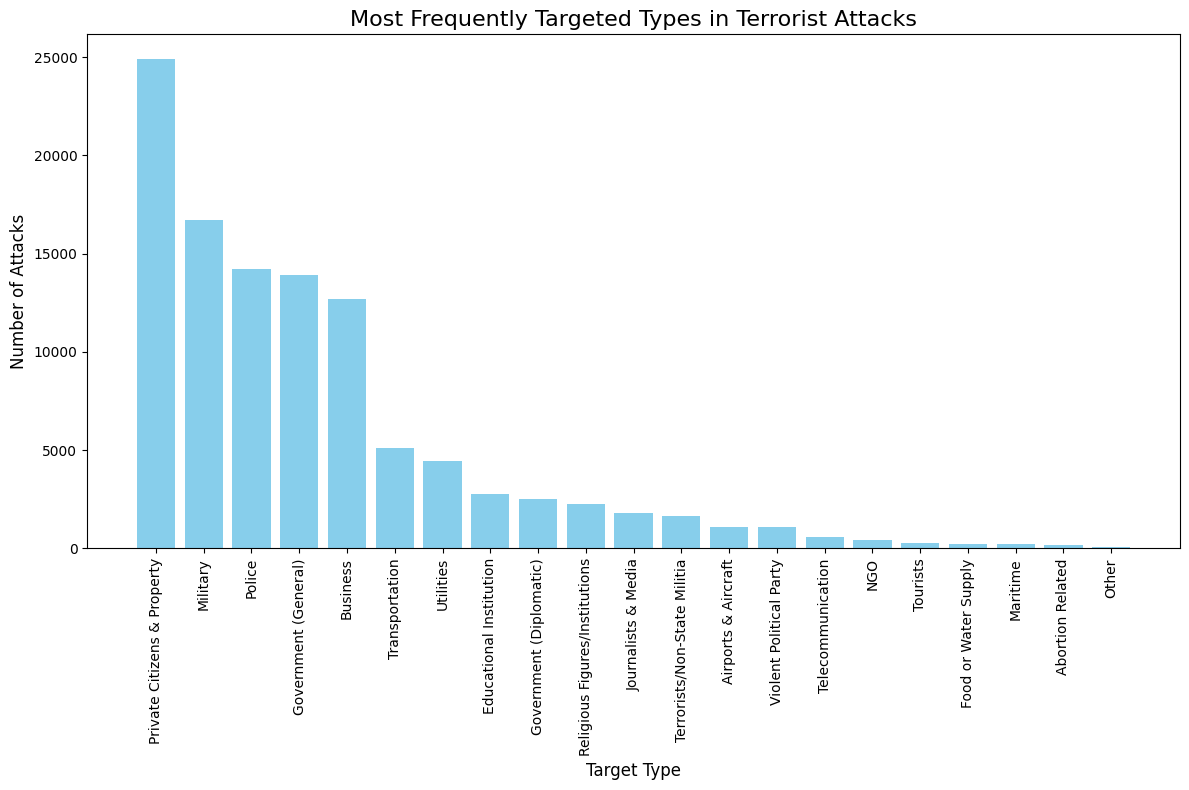

In [115]:
target_type_counts = data['TargetType'].value_counts().reset_index()
target_type_counts.columns = ['TargetType', 'AttackCount']

target_type_counts = target_type_counts.sort_values(by='AttackCount', ascending=False)

plt.figure(figsize=(12, 8))

plt.bar(target_type_counts['TargetType'], target_type_counts['AttackCount'], color='skyblue')

plt.title('Most Frequently Targeted Types in Terrorist Attacks', fontsize=16)
plt.xlabel('Target Type', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

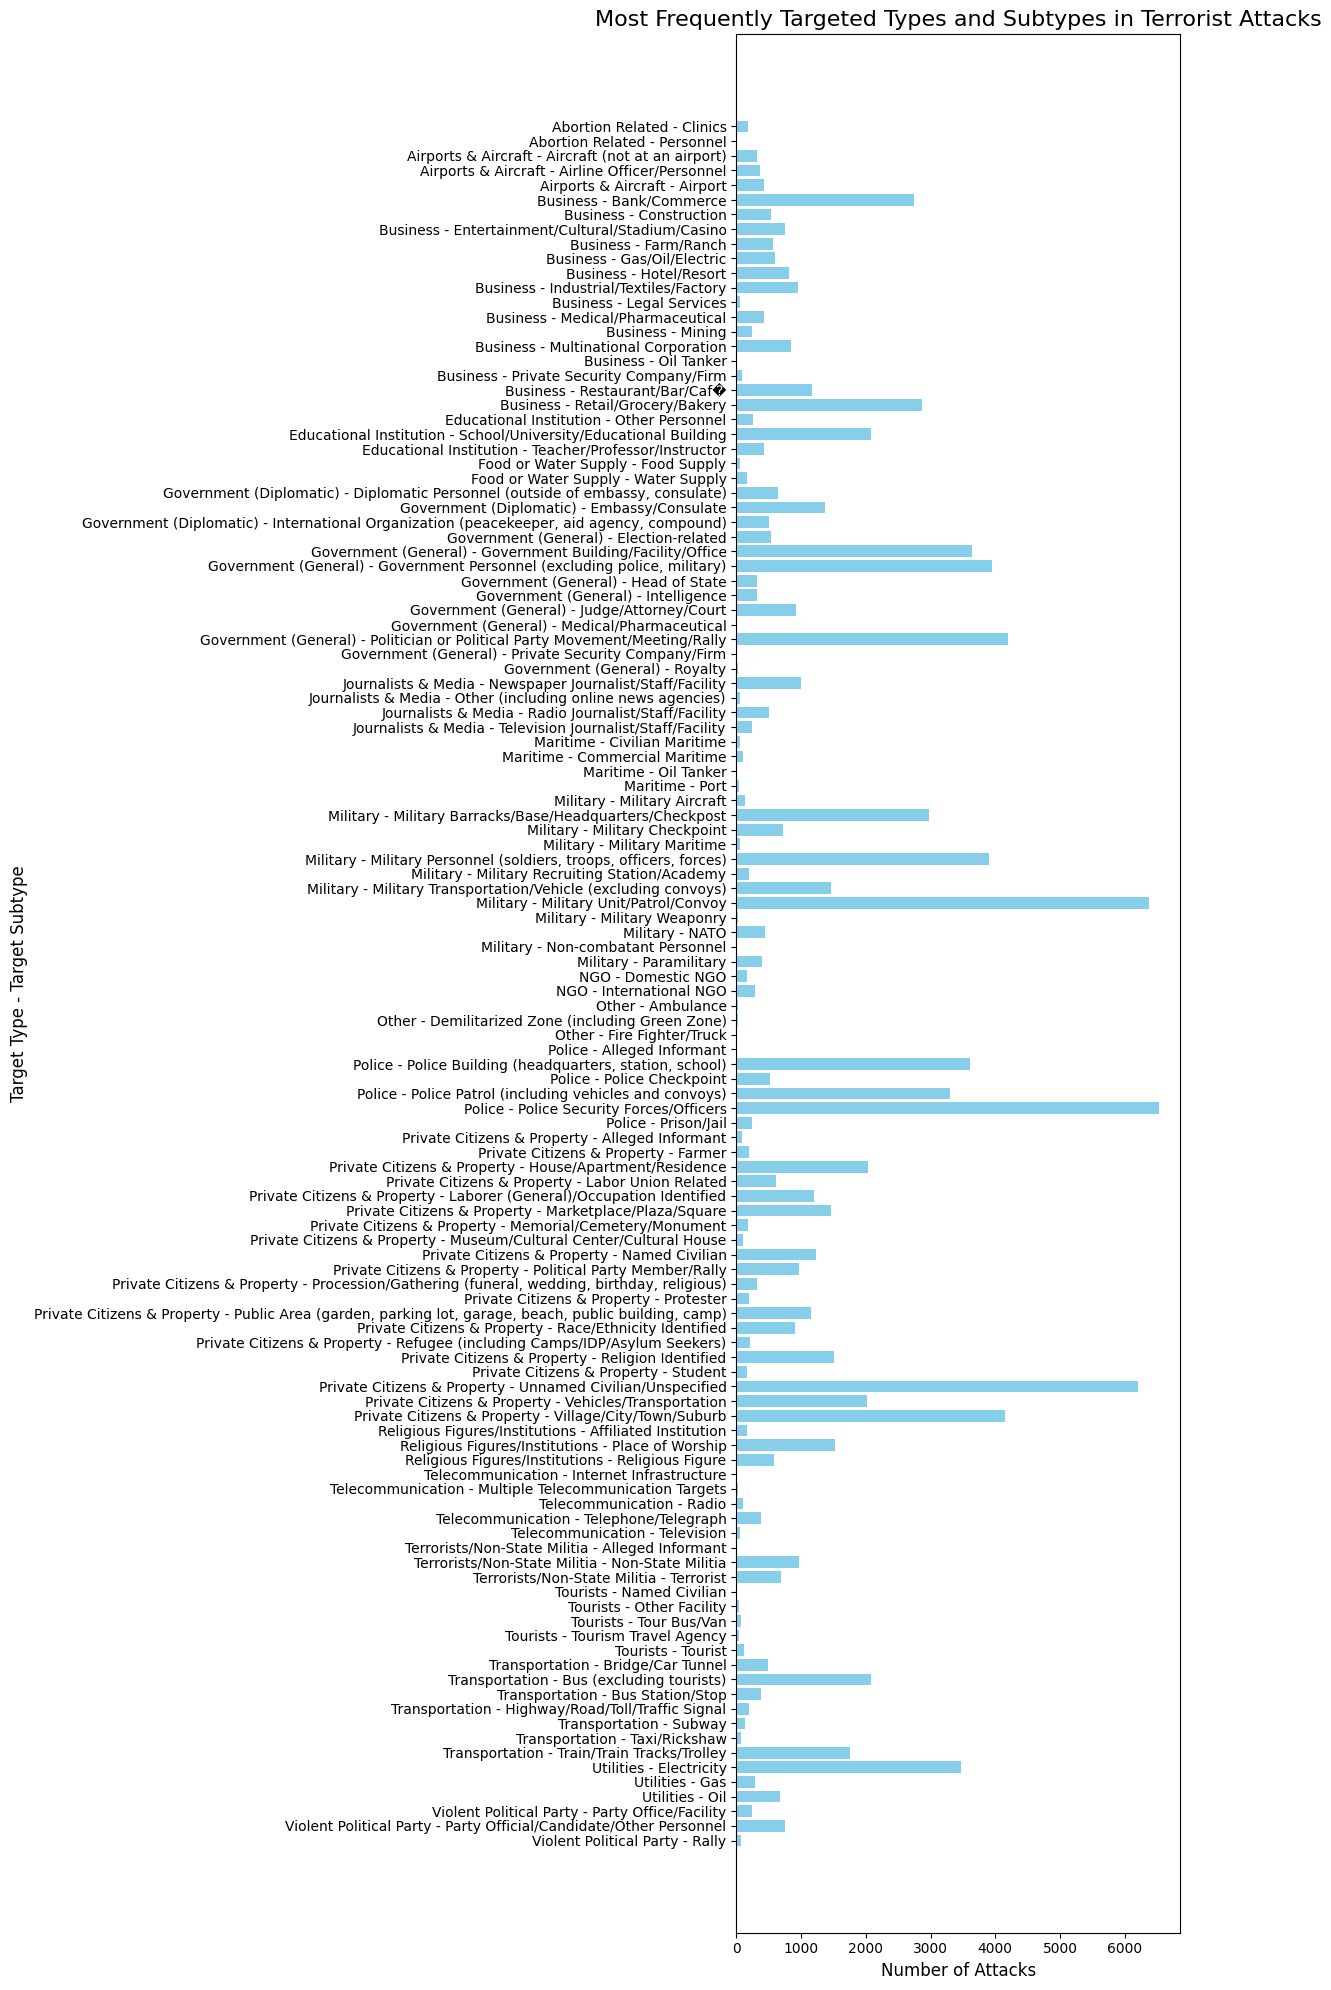

In [116]:
target_counts = data.groupby(['TargetType', 'TargetSubType']).size().reset_index(name='AttackCount')

target_counts['TotalAttacks'] = target_counts.groupby('TargetType')['AttackCount'].transform('sum')

target_counts = target_counts.sort_values(by=['TargetType', 'TotalAttacks'], ascending=[True, False])

sns.set_palette("Set3")

plt.figure(figsize=(12, 20))

ax = plt.gca()
ax.barh(target_counts['TargetType'] + ' - ' + target_counts['TargetSubType'],
        target_counts['AttackCount'], color='skyblue')

plt.title('Most Frequently Targeted Types and Subtypes in Terrorist Attacks', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Target Type - Target Subtype', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

IndexError: ignored

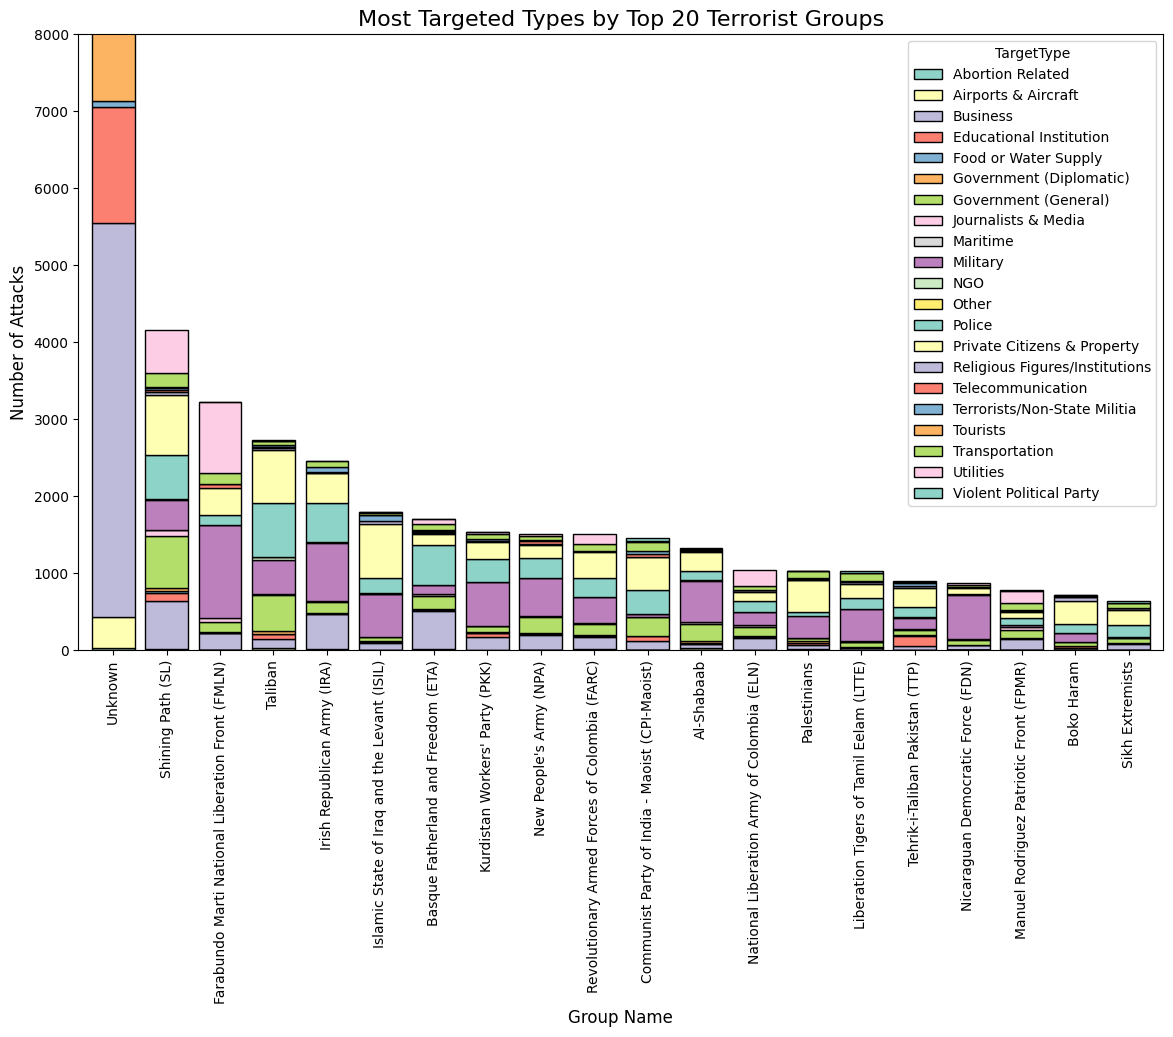

In [132]:
grouped_data = data.groupby(['GroupName', 'TargetType']).size().unstack(fill_value=0)

# Calculate the total number of attacks for each group
grouped_data['TotalAttacks'] = grouped_data.sum(axis=1)

# Sort the groups by the total number of attacks in descending order and select the top 20
grouped_data = grouped_data.sort_values(by='TotalAttacks', ascending=False).head(20)

# Define a custom color palette for the target types
target_type_colors = sns.color_palette("Set3", len(grouped_data.columns) - 2)  # -2 to exclude 'TotalAttacks' and 'MostTargetedType'

sns.set_palette(target_type_colors)  # Set the custom color palette

fig, ax = plt.subplots(figsize=(14, 8))

grouped_data.drop(columns=['TotalAttacks']).plot(kind='bar', stacked=True, ax=ax, width=0.8, edgecolor='black')

ax.set_title('Most Targeted Types by Top 20 Terrorist Groups', fontsize=16)
ax.set_xlabel('Group Name', fontsize=12)
ax.set_ylabel('Number of Attacks', fontsize=12)
ax.set_xticklabels(grouped_data.index, rotation=90, fontsize=10)
ax.set_yticklabels(range(0, 8001, 1000), fontsize=10)
ax.set_ylim(0, 8000)

# Filter out columns that are not target types when creating legend labels
legend_labels = [plt.Line2D([0], [0], color=target_type_colors[i], lw=4, label=target_type) for i, target_type in enumerate(grouped_data.drop(columns=['TotalAttacks']).columns)]
legend_labels.append(plt.Line2D([0], [0], color='black', lw=4, label='MostTargetedType'))  # Legend label for MostTargetedType
ax.legend(handles=legend_labels, title='Target Type', fontsize=10, title_fontsize=12)

sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()


# **Pattern**



*   Rows: Year
*   Columns: Attack Type
*   Colors: Number of Kills by Target Type
*   Success: Displayed as hue (colors represent success)




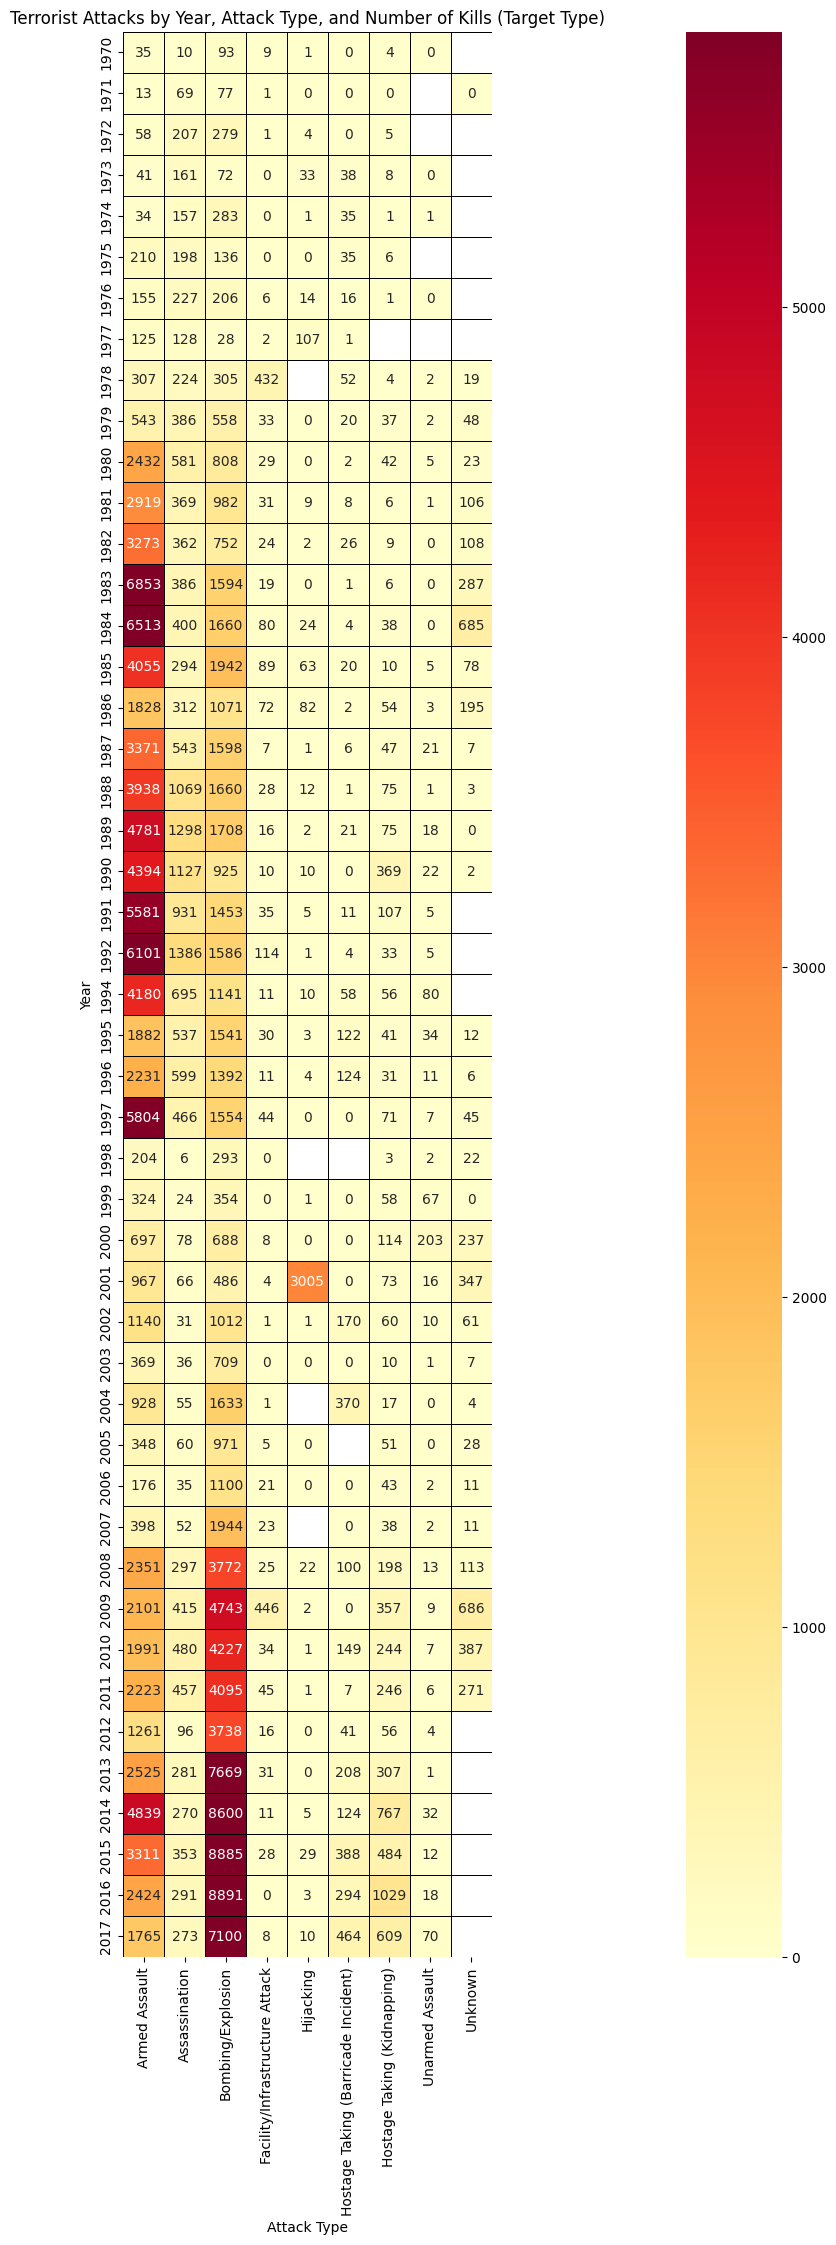

In [141]:
heatmap_data = data.pivot_table(index='Year', columns='AttackType', values='NoOfKills', aggfunc='sum')

# Create a heatmap with success as hue
plt.figure(figsize=(50,25))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f', cbar=True, linewidths=0.5, linecolor='black', square=True, robust=True)

# Set the title and labels
plt.title('Terrorist Attacks by Year, Attack Type, and Number of Kills (Target Type)')
plt.xlabel('Attack Type')
plt.ylabel('Year')

# Show the plot
plt.show()